In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [57]:
stock_df = pd.read_csv('Resources/stock_data.csv')
stock_df.head(20)

,Company Symbol,Company Name,FDS Ticker Symbol,Sedol,Entity Country Incorp,MSCI Country,Curncy Iso,Value Traded,Market Value,Unnamed: 9,...,Net Sales.19,Net Sales.20,Net Sales.21,Net Sales.22,Net Sales.23,Net Sales.24,Net Sales.25,Net Sales.26,Net Sales.27,Net Sales.28
0,BA,Boeing Company,BA-US,2108601,United States,United States,USD,1327808000,263447.00,1,...,90762.000,90079.000,88425.000,88195.000,86623.000,85140.000,83018.000,81208.000,81698.000,78951.000
1,UTX,United Technologies Corporation,UTX-US,2915500,United States,United States,USD,323256200,164934.80,1,...,65196.000,64921.000,64190.000,63007.000,62651.000,62327.000,61901.000,59695.000,57701.000,56226.000
2,LMT,Lockheed Martin Corporation,LMT-US,2522096,United States,United States,USD,281338700,143118.00,1,...,45600.000,44603.000,44836.000,44938.000,45358.000,45924.000,46446.000,46959.000,47182.000,47294.000
3,UPS,"United Parcel Service, Inc. Class B",UPS-US,2517382,United States,United States,USD,243005600,133350.30,1,...,58258.000,57361.000,56592.000,55831.000,55491.000,55044.000,54543.000,54364.000,54064.000,53708.000
4,RTN,Raytheon Company,RTN-US,2758051,United States,United States,USD,236887500,79148.73,1,...,22826.000,22553.000,22921.000,23335.000,23706.000,24275.000,24477.000,24356.000,24417.000,24419.000
5,NOC,Northrop Grumman Corporation,NOC-US,2648806,United States,United States,USD,215382500,76890.67,1,...,23979.000,24028.000,24150.000,24405.000,24661.000,24980.000,25144.000,25124.000,25218.000,25248.000
6,DE,Deere & Company,DE-US,2261203,United States,United States,USD,227465900,68447.54,1,...,34794.000,36066.900,36552.600,37062.300,38027.900,37795.300,38136.400,37716.900,36812.000,36157.100
7,GD,General Dynamics Corporation,GD-US,2365161,United States,United States,USD,161708900,68097.87,1,...,30911.000,30656.000,30701.000,31138.000,31218.000,31189.000,31327.000,31338.000,31513.000,32582.000
8,LHX,L3Harris Technologies Inc,LHX-US,BK9DTN5,United States,United States,USD,158435900,57296.18,1,...,4958.600,4975.500,5012.000,5042.200,4978.400,5042.100,5111.700,4831.100,5103.400,5262.900
9,FDX,FedEx Corporation,FDX-US,2142784,United States,United States,USD,278017300,52429.39,1,...,46763.000,46227.000,45567.000,45163.000,44815.000,44519.000,44287.000,43860.000,43471.000,42951.000


In [66]:
industry = stock_df.groupby(['GICS Sub Ind Name'])

stock_by_industry = industry['GICS Sub Ind Name'].count()

stock_by_industry 

GICS Sub Ind Name
Advertising                       4
Aerospace & Defense              24
Agricultural & Farm Machinery     5
Agricultural Products             3
Air Freight & Logistics           9
Airlines                          9
Name: GICS Sub Ind Name, dtype: int64

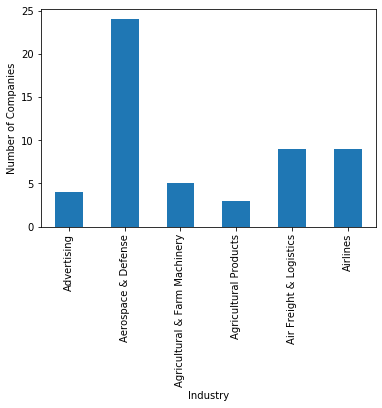

<Figure size 432x288 with 0 Axes>

In [67]:
count_chart = stock_by_industry.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Industry")
count_chart.set_ylabel("Number of Companies")


plt.show()
plt.tight_layout()

In [102]:

#industry = industry.set_index('GICS Sub Ind Name')

series = industry.mean()

In [103]:
series['2019 Q4 % Change'] = (series['Net Sales'] - series['Net Sales.4']) / series['Net Sales.4']
series['2019 Q3 % Change'] = (series['Net Sales.1'] - series['Net Sales.5']) / series['Net Sales.5']
series['2019 Q2 % Change'] = (series['Net Sales.2'] - series['Net Sales.6']) / series['Net Sales.6']
series['2019 Q1 % Change'] = (series['Net Sales.3'] - series['Net Sales.7']) / series['Net Sales.7']

series['2018 Q4 % Change'] = (series['Net Sales.4'] - series['Net Sales.8']) / series['Net Sales.8']
series['2018 Q3 % Change'] = (series['Net Sales.5'] - series['Net Sales.9']) / series['Net Sales.9']
series['2018 Q2 % Change'] = (series['Net Sales.6'] - series['Net Sales.10']) / series['Net Sales.10']
series['2018 Q1 % Change'] = (series['Net Sales.7'] - series['Net Sales.11']) / series['Net Sales.11']

series['2017 Q4 % Change'] = (series['Net Sales.8'] - series['Net Sales.12']) / series['Net Sales.12']
series['2017 Q3 % Change'] = (series['Net Sales.9'] - series['Net Sales.13']) / series['Net Sales.13']
series['2017 Q2 % Change'] = (series['Net Sales.10'] - series['Net Sales.14']) / series['Net Sales.14']
series['2017 Q1 % Change'] = (series['Net Sales.11'] - series['Net Sales.15']) / series['Net Sales.15']

series['2016 Q4 % Change'] = (series['Net Sales.12'] - series['Net Sales.16']) / series['Net Sales.16']
series['2016 Q3 % Change'] = (series['Net Sales.13'] - series['Net Sales.17']) / series['Net Sales.17']
series['2016 Q2 % Change'] = (series['Net Sales.14'] - series['Net Sales.18']) / series['Net Sales.18']
series['2016 Q1 % Change'] = (series['Net Sales.15'] - series['Net Sales.19']) / series['Net Sales.19']

series['2015 Q4 % Change'] = (series['Net Sales.16'] - series['Net Sales.20']) / series['Net Sales.20']
series['2015 Q3 % Change'] = (series['Net Sales.17'] - series['Net Sales.21']) / series['Net Sales.21']
series['2015 Q2 % Change'] = (series['Net Sales.18'] - series['Net Sales.22']) / series['Net Sales.22']
series['2015 Q1 % Change'] = (series['Net Sales.19'] - series['Net Sales.23']) / series['Net Sales.23']

series




,Value Traded,Market Value,Unnamed: 9,Net Sales,Net Sales.1,Net Sales.2,Net Sales.3,Net Sales.4,Net Sales.5,Net Sales.6,...,2017 Q2 % Change,2017 Q1 % Change,2016 Q4 % Change,2016 Q3 % Change,2016 Q2 % Change,2016 Q1 % Change,2015 Q4 % Change,2015 Q3 % Change,2015 Q2 % Change,2015 Q1 % Change
GICS Sub Ind Name,,,,,,,,,,,,,,,,,,,,,
Advertising,4.083476e+07,9183.773925,1.0,6972.688250,6961.969500,6967.607250,6961.987750,6850.719250,6747.949250,6592.732000,...,0.015000,0.015830,0.008308,0.001421,-0.006529,-0.009881,0.002022,0.021303,0.039337,0.047729
Aerospace & Defense,1.330698e+08,41987.787950,1.0,16194.933708,16009.455500,16061.155042,15604.275458,15212.258333,14851.369917,14556.867083,...,-0.001558,0.011916,-0.003702,0.002512,0.006744,0.003631,0.023072,0.028095,0.025649,0.025684
Agricultural & Farm Machinery,5.676329e+07,17721.566280,1.0,10657.985000,10559.016200,10636.232800,10509.882400,10276.148200,9944.001800,9332.409000,...,-0.016367,-0.037792,-0.075809,-0.131009,-0.157976,-0.192188,-0.192167,-0.150475,-0.113981,-0.084146
Agricultural Products,4.827248e+07,14781.507667,1.0,24452.694000,24135.416000,24409.630667,24510.402333,24589.545000,24323.774667,23626.412000,...,-0.016454,-0.066981,-0.121208,-0.131613,-0.159191,-0.156393,-0.132968,-0.141434,-0.099236,-0.070343
Air Freight & Logistics,8.571880e+07,25781.186100,1.0,21556.969667,21546.533111,21514.805333,21482.280889,21115.183778,20598.359444,19997.869556,...,0.107652,0.109423,0.103351,0.089716,0.072136,0.055001,0.053125,0.055819,0.066206,0.065889
Airlines,9.627536e+07,17827.200333,1.0,20135.509556,19958.457444,19717.462333,19543.143000,19245.470444,18870.831444,18591.649444,...,-0.002677,-0.010076,-0.016160,-0.009961,-0.008689,-0.002377,0.024955,0.065787,0.121444,0.153209


In [116]:
y_axis = pd.DataFrame([series['2019 Q1 % Change'], series['2019 Q2 % Change'], series['2019 Q3 % Change'], series['2019 Q4 % Change'],
                      series['2018 Q1 % Change'], series['2018 Q2 % Change'], series['2018 Q3 % Change'], series['2018 Q4 % Change'],
                      series['2017 Q1 % Change'], series['2017 Q2 % Change'], series['2017 Q3 % Change'], series['2017 Q4 % Change'],
                      series['2016 Q1 % Change'], series['2016 Q2 % Change'], series['2016 Q3 % Change'], series['2016 Q4 % Change'],
                      series['2015 Q1 % Change'], series['2015 Q2 % Change'], series['2015 Q3 % Change'], series['2015 Q4 % Change'],
                      ])

y_axis

GICS Sub Ind Name,Advertising,Aerospace & Defense,Agricultural & Farm Machinery,Agricultural Products,Air Freight & Logistics,Airlines
2019 Q1 % Change,0.077048,0.090952,0.206231,0.045398,0.107452,0.067950
2019 Q2 % Change,0.056862,0.103339,0.139709,0.033150,0.075855,0.060555
2019 Q3 % Change,0.031716,0.077978,0.061848,-0.007744,0.046032,0.057635
2019 Q4 % Change,0.017804,0.064598,0.037158,-0.005565,0.020923,0.046247
2018 Q1 % Change,-0.008311,0.015719,0.139364,-0.016558,0.107034,0.053992
2018 Q2 % Change,0.009403,0.039960,0.208508,-0.020064,0.113351,0.064879
2018 Q3 % Change,0.039941,0.064323,0.245325,0.018556,0.113509,0.060552
2018 Q4 % Change,0.060556,0.081830,0.231017,0.043468,0.121918,0.070351
2017 Q1 % Change,0.015830,0.011916,-0.037792,-0.066981,0.109423,-0.010076
2017 Q2 % Change,0.015000,-0.001558,-0.016367,-0.016454,0.107652,-0.002677


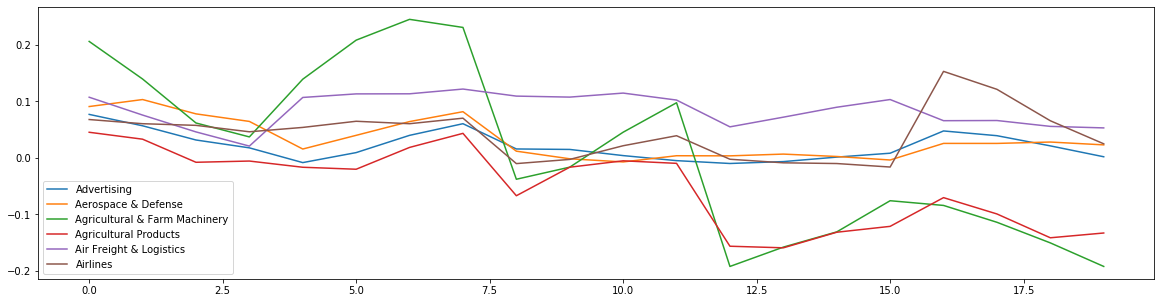

In [118]:
x_axis = np.arange(0, 20, 1)

plt.figure(figsize=(20,5))

myplot = plt.plot(x_axis, y_axis)
plt.legend(myplot, y_axis, loc='best')

plt.savefig('testplot.pdf')